In [65]:
#import dependencies
import pandas
import numpy
import hvplot.pandas
import matplotlib.pyplot as plt

#machine learning dependencies
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, OneHotEncoder


#connection to db
from connect_sql_db import build_engine

# Polynomial Regression Model

In [66]:
#look into polynomial linear regression


# Neural Network Classifier 

In [67]:
engine = build_engine(database_name="database1",host="35.225.193.21")

In [68]:
cleaned_df = pandas.read_sql("select * from cleaned_table",con=engine)

In [69]:
cleaned_df["stars"] = cleaned_df.stars.apply(lambda x: int(x))

In [70]:
X = cleaned_df.drop(cleaned_df.dtypes[cleaned_df.dtypes == "object"].index.tolist(), axis = 1)

In [71]:
y = cleaned_df.stars
X = X.drop("stars", axis=1).values

In [72]:
y.value_counts()

4    1972
3    1711
2     351
1      46
5      38
Name: stars, dtype: int64

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = 1
)

In [74]:
X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

enc = OneHotEncoder()
enc.fit(y_train.values.reshape(-1, 1))
encoded_y_train = enc.transform(y_train.values.reshape(-1, 1)).toarray()
encoded_y_test = enc.transform(y_train.values.reshape(-1, 1)).toarray()

In [75]:
model = Sequential()

In [76]:
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))

model.add(Dense(50, activation='relu'))

model.add(Dense(10, activation='relu'))

In [77]:
model.add(Dense(5, activation="softmax"))

In [78]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [79]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               19300     
_________________________________________________________________
dense_9 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 55        
Total params: 24,915
Trainable params: 24,915
Non-trainable params: 0
_________________________________________________________________


In [80]:
fit_model = model.fit(
    X_train,
    encoded_y_train,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
97/97 - 0s - loss: 1.5337 - accuracy: 0.4770
Epoch 2/100
97/97 - 0s - loss: 0.9825 - accuracy: 0.5301
Epoch 3/100
97/97 - 0s - loss: 0.9770 - accuracy: 0.5418
Epoch 4/100
97/97 - 0s - loss: 0.9620 - accuracy: 0.5644
Epoch 5/100
97/97 - 0s - loss: 0.9293 - accuracy: 0.5771
Epoch 6/100
97/97 - 0s - loss: 0.8949 - accuracy: 0.6108
Epoch 7/100
97/97 - 0s - loss: 0.8832 - accuracy: 0.6091
Epoch 8/100
97/97 - 0s - loss: 0.8893 - accuracy: 0.6040
Epoch 9/100
97/97 - 0s - loss: 0.8659 - accuracy: 0.6185
Epoch 10/100
97/97 - 0s - loss: 0.8458 - accuracy: 0.6156
Epoch 11/100
97/97 - 0s - loss: 0.8664 - accuracy: 0.6169
Epoch 12/100
97/97 - 0s - loss: 0.8731 - accuracy: 0.6052
Epoch 13/100
97/97 - 0s - loss: 0.8324 - accuracy: 0.6289
Epoch 14/100
97/97 - 0s - loss: 0.8126 - accuracy: 0.6418
Epoch 15/100
97/97 - 0s - loss: 0.8179 - accuracy: 0.6396
Epoch 16/100
97/97 - 0s - loss: 0.8169 - accuracy: 0.6396
Epoch 17/100
97/97 - 0s - loss: 0.8239 - accuracy: 0.6392
Epoch 18/100
97/97 - 0s

In [81]:
# Make predictions
predicted = model.predict(X_test_scaled)
predicted = enc.inverse_transform(predicted).flatten().tolist()
results = pandas.DataFrame({
    "Actual": y_test,
    "Predicted": predicted
})
results.head(10)

,Actual,Predicted
2051,4,3
1520,2,1
823,3,2
3634,4,1
2932,4,2
2435,2,1
1953,3,2
200,4,2
1915,4,4
2538,3,3


In [82]:
print(classification_report(results.Actual, results.Predicted))

              precision    recall  f1-score   support

           1       0.04      1.00      0.08        10
           2       0.11      0.45      0.18        96
           3       0.37      0.08      0.13       426
           4       0.65      0.39      0.49       490
           5       0.00      0.00      0.00         8

    accuracy                           0.27      1030
   macro avg       0.24      0.38      0.18      1030
weighted avg       0.47      0.27      0.31      1030



<AxesSubplot:>

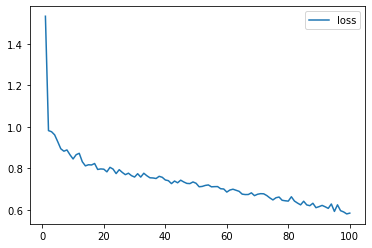

In [83]:
#testing
result_df = pandas.DataFrame(
    fit_model.history,
    index = range(1, len(fit_model.history["loss"]) + 1)
)

result_df.plot(y="loss")

<AxesSubplot:>

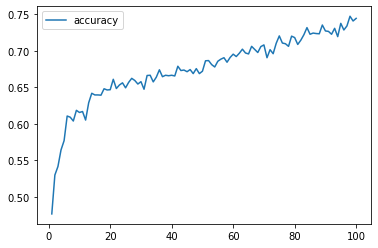

In [84]:
#testing
result_df = pandas.DataFrame(
    fit_model.history,
    index = range(1, len(fit_model.history["accuracy"]) + 1)
)

result_df.plot(y="accuracy")

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [ ]:
#r2